This notebook allows you to read nanoAODs and make plots. You can run it on SWAN, but I prefer to run it from terminal using the following method:

- ssh -L localhost:8888:localhost:8888 hichemb@cmslpc-sl7.fnal.gov
- run this notebook from a CMSSW environment preferrably (cmsenv)
- You can copy one of or multiple nano.root files in the same directory or adjust path as needed
- jupyter notebook --no-browser --port=8888
- Follow the link and open the notebook

In [5]:
# This cell might take a few minutes to run
import sys
from scipy.stats.stats import pearsonr
import numpy as np
import math
import matplotlib as mpl
import matplotlib.backends.backend_pdf as backpdf
from  matplotlib import pyplot as plt
import pylab

import ROOT
from ROOT import TChain, TSelector, TTree
from ROOT import TCanvas, TPad, TFile, TPaveText
from ROOT import gBenchmark, gStyle, gROOT

# These imports disable display for some reason
#from IPython.display import Image
#from IPython.display import display

# https://root.cern.ch/doc/master/group__tutorial__pyroot.html
# https://nbviewer.org/url/root.cern/doc/master/notebooks/ntuple1.py.nbconvert.ipynb
#rdf = ROOT.RDataFrame("Events", "step3_inNANOEDMAODSIM_1.root");

In [6]:
# Opening one root file
file = ROOT.TFile("Btag_test.root")
file.ls()
tree = file.Get("Events")

N = tree.GetEntries()
print("Number of events:",N)
#tree.Print()

Number of events: 1692120
TFile**		Btag_test.root	
 TFile*		Btag_test.root	
  KEY: TObjString	tag;1	Collectable string class
  KEY: TTree	Events;1	Events
  KEY: TTree	LuminosityBlocks;1	LuminosityBlocks
  KEY: TTree	Runs;1	Runs
  KEY: TTree	MetaData;1	Job metadata
  KEY: TTree	ParameterSets;1	Parameter sets


In [7]:
# Opening many root files
root_files = open("DeepCore_nano_list.txt", "r")
chain = TChain("Events")

for line in root_files:
    print("Adding file: " + line)
    chain.Add(line[:-1])

N = chain.GetEntries()
print("Number of events:",N)
#t.Print()


Adding file: DeepCore_nano_1.root

Adding file: DeepCore_nano_2.root

Number of events: 80900


Instead of Printing branches here, it's better to dump the branches in a text file from the command line and search variables using Vim:
- root -b DeepCore_nano_1.root
- .> DeepCore_nano_branches.txt
- Events ->Print()
- .>

In [8]:
# Template to extract the variables you need to plot

#tree = chain

gen_jet_eta = []
gen_jet_pt = []
gen_jet_phi = []
jet_eta = []
jet_pt = []
jet_phi =  []

PV_z = []
PV_n = []

a = 0
N = tree.GetEntries()
print(N)

for event in tree:
   # PV_n.append(event.PV_npvs)
    for i in range(event.nGenJet):
        gen_jet_eta.append(event.GenJet_eta[i])
        gen_jet_pt.append(event.GenJet_pt[i])
        gen_jet_phi.append(event.GenJet_phi[i])
    for i in range(event.nJet):
        jet_eta.append(event.Jet_eta[i])
        jet_pt.append(event.Jet_pt[i])
        jet_phi.append(event.Jet_phi[i])
    # Since it may take a while to run, a statement like this is useful to evaluate run time
    a= a+1
    if (a%100000 ==0):
        print(a)


1692120
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000


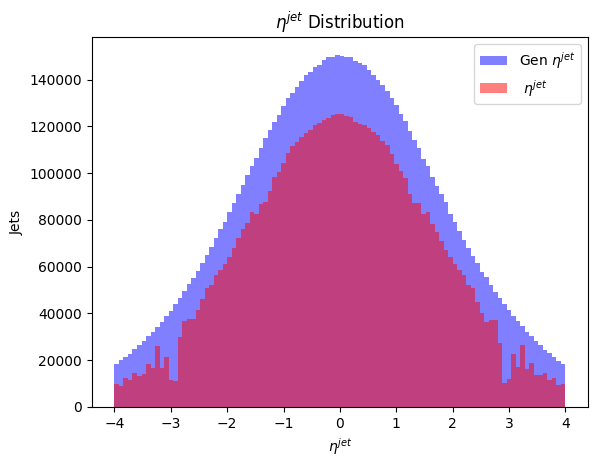

In [9]:
# Template for plotting 2 overlaid variables (eta) 
bin_size = 100
plt.hist(gen_jet_eta, color = 'b', alpha = 0.5, label = 'Gen $\eta^{jet}$ ', range = (-4,4), bins = bin_size)
plt.hist(jet_eta, color = 'r', alpha = 0.5, label = ' $\eta^{jet}$ ', range = (-4,4), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$\eta^{jet}$')
plt.ylabel('Jets')
plt.title('$\eta^{jet}$ Distribution')
plt.show()


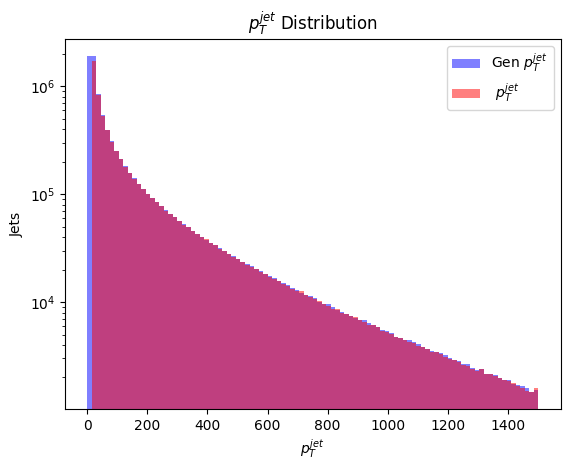

In [10]:
# Plotting pt
bin_size = 100
plt.hist(gen_jet_pt, color = 'b', alpha = 0.5, label = 'Gen $p_T^{jet}$ ', range = (0,1500), bins = bin_size)
plt.hist(jet_pt, color = 'r', alpha = 0.5, label = ' $p_T^{jet}$ ', range = (0,1500), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$p_T^{jet}$')
plt.ylabel('Jets')
plt.title('$p_T^{jet}$ Distribution')
plt.yscale('log')
plt.show()

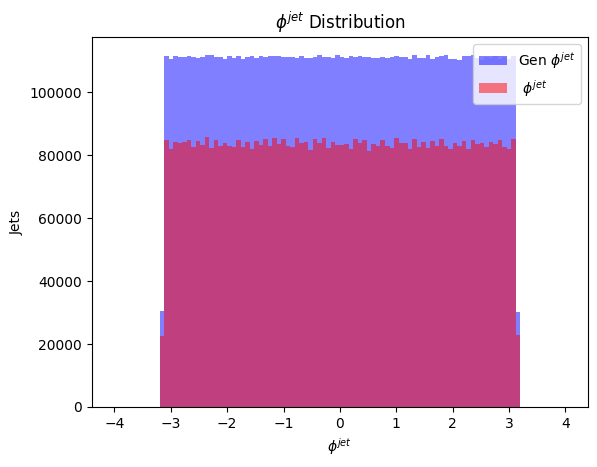

In [11]:
# Plotting phi
bin_size = 100
plt.hist(gen_jet_phi, color = 'b', alpha = 0.5, label = 'Gen $\phi^{jet}$ ', range = (-4,4), bins = bin_size)
plt.hist(jet_phi, color = 'r', alpha = 0.5, label = ' $\phi^{jet}$ ', range = (-4,4), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$\phi^{jet}$')
plt.ylabel('Jets')
plt.title('$\phi^{jet}$ Distribution')
plt.show()

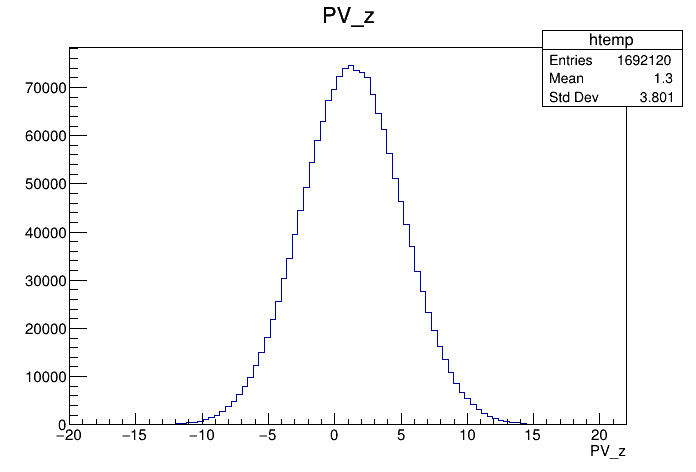

Info in <TCanvas::Print>: png file hist.png has been created


In [17]:
# Plotitng a variable directly, without extracting it (faster)
#t.Draw("Jet_eta", "(Jet_pt>100)&&(Jet_eta<1.4)")
#t.Draw("PV_z")

from IPython.display import Image
from IPython.display import display

tree.Draw("PV_z")
ROOT.gPad.SaveAs("hist.png") #pdf
display(Image("hist.png"))

The rest of the notebook includes examples of NanoAODs I had to read and variables I had to plot

In [18]:
# finding out fraction of b jets in flat_pt sample
file = ROOT.TFile("Btag_test.root")
file.ls()
tree = file.Get("Events")
#tree = file.Get("Runs")

TFile**		Btag_test.root	
 TFile*		Btag_test.root	
  KEY: TObjString	tag;1	Collectable string class
  KEY: TTree	Events;1	Events
  KEY: TTree	LuminosityBlocks;1	LuminosityBlocks
  KEY: TTree	Runs;1	Runs
  KEY: TTree	MetaData;1	Job metadata
  KEY: TTree	ParameterSets;1	Parameter sets


In [ ]:
jet_pt = []
jet_b_pt =  []

a = 0
N = tree.GetEntries()
print(N)
for event in tree:
   # PV_n.append(event.PV_npvs)
   # for i in range(event.PV_npvs):
   #     PV_z.append(event.PV_z[i])
    for i in range(event.nJet):
        jet_pt.append(event.Jet_pt[i])
        if (event.Jet_hadronFlavour[i]==5) : # b-jet only
            jet_b_pt.append(event.Jet_pt[i])
    a= a+1
    if (a%100000 ==0):
        print(a)

1692120


In [ ]:
# Plotting 
bin_size = 100
plt.hist(jet_b_pt, color = 'b', alpha = 0.5, label = ' $p_T^{b-jet}$ ', range = (0,3500), bins = bin_size)
plt.hist(jet_pt, color = 'r', alpha = 0.5, label = ' $p_T^{jet}$ ', range = (0,3500), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$p_T^{jet}$')
plt.ylabel('Jets')
plt.title('$p_T^{jet}$ Distribution')
plt.yscale('log')
plt.show()

In [8]:
# Now doing the same for DeepCore nano
root_files = open("/eos/uscms/store/user/hichemb/DeepCore_nano/DeepCore_nano_files.txt", "r")
chain = TChain("Events")

for line in root_files:
    print("Adding file: " + line)
    chain.Add(line[:-1])

N = chain.GetEntries()
print("Number of events:",N)
#t.Print()
tree = chain


Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/04165c0c-fa29-49d0-ae1f-3137ed51d875.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/054bdc27-1428-437d-8b67-ef429b2c160c.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/0a7d88aa-5bfb-4f72-945a-7da079600984.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/18ddfacf-5663-423a-8721-7ac020f50268.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/1df0fdad-ff4e-490a-a85a-cb2586dd624b.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/28a14184-ac66-4c04-9f35-bd2dfcc4ae7a.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/305dd355-8293-4409-844b-1f983f6403d2.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/43401e28-46d2-4e65-a23a-3d709be0fd09.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/4371829d-bfbe-4a62-9d1d-6bb07d330ed5.root

Adding file: /eos/uscms/store/user/hichemb/DeepCore_nano/45d7e860-939b-4c95-a247-7527a2bbe9b8.root



In [9]:
jet_pt = []
jet_b_pt =  []

a = 0
N = tree.GetEntries()
print(N)
for event in tree:
   # PV_n.append(event.PV_npvs)
   # for i in range(event.PV_npvs):
   #     PV_z.append(event.PV_z[i])
    for i in range(event.nJet):
        jet_pt.append(event.Jet_pt[i])
        if (event.Jet_hadronFlavour[i]==5) : # b-jet only
            jet_b_pt.append(event.Jet_pt[i])
    a= a+1
    if (a%10000 ==0):
        print(a)

1897600
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380

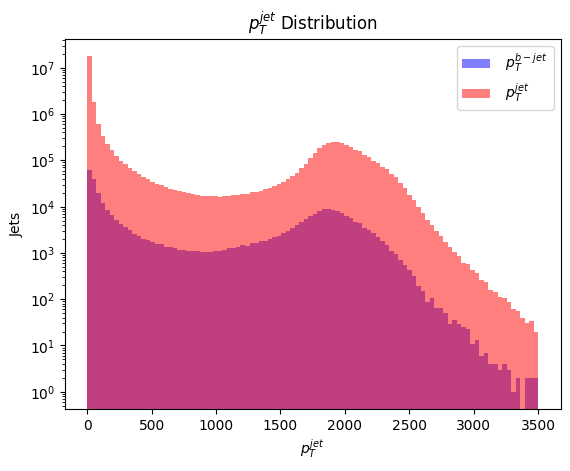

In [10]:
# Plotting 
bin_size = 100
plt.hist(jet_b_pt, color = 'b', alpha = 0.5, label = ' $p_T^{b-jet}$ ', range = (0,3500), bins = bin_size)
plt.hist(jet_pt, color = 'r', alpha = 0.5, label = ' $p_T^{jet}$ ', range = (0,3500), bins = bin_size)
plt.legend(loc='best')
plt.xlabel('$p_T^{jet}$')
plt.ylabel('Jets')
plt.title('$p_T^{jet}$ Distribution')
plt.yscale('log')
plt.show()

In [5]:
# Trying to read NanoAOD from running a workflow
file = ROOT.TFile("step3_inNANOEDMAODSIM_1.root")
#f = ROOT.TFile("step3_inMINIAODSIM_1.root")
#f = ROOT.TFile("step3_1.root")
#f = ROOT.TFile("step3_inDQM_1.root")
file.ls()
tree = file.Get("Events")

TFile**		step3_inNANOEDMAODSIM_1.root	
 TFile*		step3_inNANOEDMAODSIM_1.root	
  KEY: TTree	MetaData;1	
  KEY: TTree	ParameterSets;1	
  KEY: TTree	Parentage;1	
  KEY: TTree	Events;1	
  KEY: TTree	LuminosityBlocks;1	
  KEY: TTree	Runs;1	


In [6]:
tree.Print()

******************************************************************************
*Tree    :Events    :                                                        *
*Entries :      100 : Total =         9957605 bytes  File  Size =    2066121 *
*        :          : Tree compression factor =   4.41                       *
******************************************************************************
*Br    0 :EventAuxiliary : edm::EventAuxiliary                               *
*Entries :      100 : Total  Size=      12371 bytes  File Size  =       2364 *
*Baskets :        6 : Basket Size=       2396 bytes  Compression=   5.01     *
*............................................................................*
*Br    1 :EventProductProvenance : vector<edm::StoredProductProvenance>      *
*Entries :      100 : Total  Size=    1396477 bytes  File Size  =     829312 *
*Baskets :      100 : Basket Size=       2396 bytes  Compression=   1.68     *
*...................................................

The variable here are not in the usual Nano format, they're objects

In [7]:
# reading NanoAOD file from bbtautau sample + plotting with pyRoot
c1 = TCanvas('c1','The Ntuple canvas',200,10,500,500)
gBenchmark.Start('ntuple1')

file = ROOT.TFile("histo_1.root")
file.ls()
#t = f.Get("Events")
tree = file.Get("demo/tree")

ntuple = tree
#ntuple.Print()

TFile**		histo_1.root	
 TFile*		histo_1.root	
  KEY: TDirectoryFile	demo;1	demo


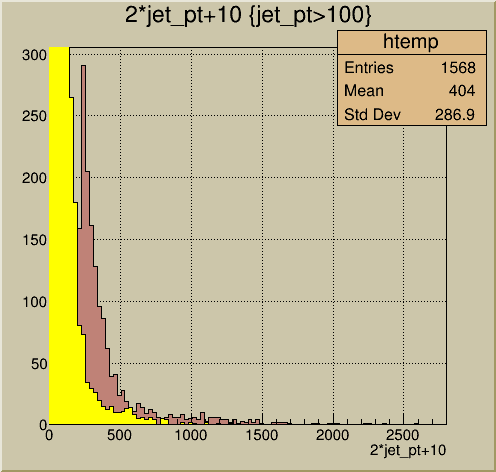

Error in <TPad::TPad>: illegal width: 0.000000
Info in <TPad::Print>: png file hist.png has been created


In [9]:
# These imports disable display for some reason but they are needed here
from IPython.display import Image
from IPython.display import display

pad1 = TPad('pad1','This is pad1',0.02,0.98,0.02,0.98,21)
#pad2 = TPad('pad2','This is pad2',0.52,0.52,0.98,0.98,21)
#pad3 = TPad('pad3','This is pad3',0.02,0.02,0.48,0.48,21)
#pad4 = TPad('pad4','This is pad4',0.52,0.02,0.98,0.48,1)
pad1.Draw()
#pad2.Draw()
#pad3.Draw()
#pad4.Draw()

gStyle.SetStatW(0.30)
gStyle.SetStatH(0.20)
gStyle.SetStatColor(42)

pad1.cd()
pad1.SetGrid()
#pad1.SetLogy()
pad1.GetFrame().SetFillColor(0)
#ntuple = gROOT.FindObject('ntuple')
ntuple.SetLineColor(1)
ntuple.SetFillStyle(1001)
ntuple.SetFillColor(45)
ntuple.Draw('2*jet_pt+10','jet_pt>100')
ntuple.SetFillColor(5)
ntuple.Draw('jet_pt','jet_pt>10','same')
c1.Update()
ROOT.gPad.SaveAs("hist.png") #pdf
display(Image("hist.png"))